In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
data=pd.read_csv("Company_Data.csv")
data.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA ON THE DATA

In [4]:
from sklearn.preprocessing import LabelEncoder 
label_encoder=LabelEncoder()

In [5]:
data["ShelveLoc"]=label_encoder.fit_transform(data["ShelveLoc"])

In [6]:
data["Urban"]=label_encoder.fit_transform(data["Urban"])

In [7]:
data["US"]=label_encoder.fit_transform(data["US"])

In [8]:
data["sale"]=pd.cut(data["Sales"],bins=[-1,5,10,17],labels=["LOW","MEDIUM","HIGH"])

In [9]:
data["sale_type"]=label_encoder.fit_transform(data["sale"])

In [10]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale,sale_type
0,9.50,138,73,11,276,120,0,42,17,1,1,MEDIUM,2
1,11.22,111,48,16,260,83,1,65,10,1,1,HIGH,0
2,10.06,113,35,10,269,80,2,59,12,1,1,HIGH,0
3,7.40,117,100,4,466,97,2,55,14,1,1,MEDIUM,2
4,4.15,141,64,3,340,128,0,38,13,1,0,LOW,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,HIGH,0
396,6.14,139,23,3,37,120,2,55,11,0,1,MEDIUM,2
397,7.41,162,26,12,368,159,2,40,18,1,1,MEDIUM,2
398,5.94,100,79,7,284,95,0,50,12,1,1,MEDIUM,2


In [11]:
data["sale_type"].value_counts()

2    245
0     78
1     77
Name: sale_type, dtype: int64

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'sale_type : 0-HIGH 1-LOW 2-MEDIUM')

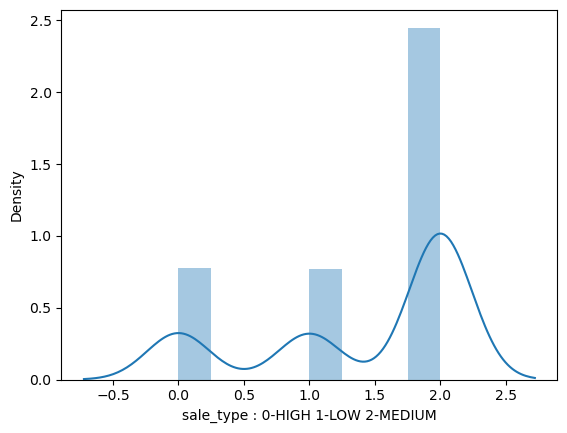

In [14]:
sns.distplot(data["sale_type"])
plt.xlabel("sale_type : 0-HIGH 1-LOW 2-MEDIUM")

Text(0.5, 0, 'ShelveLoc : 0-bad 1-good 2-medium ')

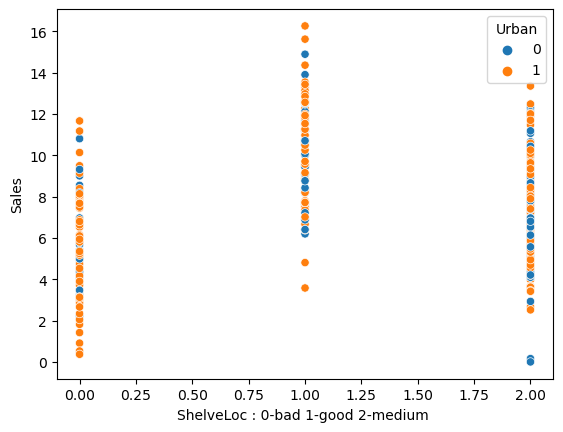

In [15]:
sns.scatterplot(x="ShelveLoc",y="Sales",data=data,hue="Urban")
plt.xlabel("ShelveLoc : 0-bad 1-good 2-medium ")

0-HIGH 1-LOW 2-MEDIUM

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    int32   
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    int32   
 10  US           400 non-null    int32   
 11  sale         400 non-null    category
 12  sale_type    400 non-null    int32   
dtypes: category(1), float64(1), int32(4), int64(7)
memory usage: 31.9 KB


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()
x=scaler.fit_transform(data.iloc[:,1:11])

In [19]:
y=data.iloc[:,-1]
y

0      2
1      0
2      0
3      2
4      1
      ..
395    0
396    2
397    2
398    2
399    2
Name: sale_type, Length: 400, dtype: int32

# MODEL BUILDING

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

RANDOM FOREST

In [21]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [22]:
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
importances=model.feature_importances_
importances

array([0.12784206, 0.11532906, 0.09319459, 0.11699275, 0.20214396,
       0.09548355, 0.14022263, 0.07505269, 0.01742721, 0.0163115 ])

# FEATURE IMPORTANCES OF THE MODEL

In [24]:
indices = np.argsort(importances)[::-1]
indices

array([4, 6, 0, 3, 1, 5, 2, 7, 8, 9], dtype=int64)

([<matplotlib.axis.XTick at 0x1b245b4bdc0>,
 [Text(0, 0, 'Price'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'CompPrice'),
  Text(3, 0, 'Population'),
  Text(4, 0, 'Income'),
  Text(5, 0, 'ShelveLoc'),
  Text(6, 0, 'Advertising'),
  Text(7, 0, 'Education'),
  Text(8, 0, 'Urban'),
  Text(9, 0, 'US')])

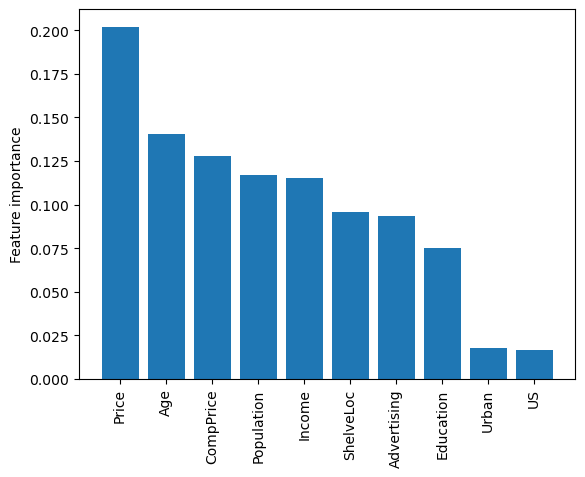

In [25]:
plt.ylabel('Feature importance')
plt.bar(range(x_train.shape[1]), 
        importances[indices],
        align='center')

feat_labels = data.iloc[:,1:11].columns
plt.xticks(range(x_train.shape[1]), 
           feat_labels[indices],rotation=90)

In [26]:
imp_df=pd.DataFrame({"Features":data.iloc[:,1:11].columns,"Importances":importances*100})
imp_df.sort_values(by="Importances",ascending=False)

,Features,Importances
4,Price,20.214396
6,Age,14.022263
0,CompPrice,12.784206
3,Population,11.699275
1,Income,11.532906
5,ShelveLoc,9.548355
2,Advertising,9.319459
7,Education,7.505269
8,Urban,1.742721
9,US,1.631150


In [27]:
pred=model.predict(x_test)
pred

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2])

In [28]:
np.mean(pred==y_test)*100

73.75

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        19
           1       1.00      0.36      0.53        14
           2       0.69      1.00      0.82        47

    accuracy                           0.74        80
   macro avg       0.90      0.58      0.63        80
weighted avg       0.82      0.74      0.70        80



BAGGING MODEL WITH HYPERPARAMETER TUNING

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
cart=BaggingClassifier()
param_grid=[{"base_estimator":[LogisticRegression(),DecisionTreeClassifier()],"n_estimators":[100,200,300],"random_state":[0,10,42]}]

In [54]:
grid=GridSearchCV(cart,param_grid,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid=[{'base_estimator': [LogisticRegression(),
                                             DecisionTreeClassifier()],
                          'n_estimators': [100, 200, 300],
                          'random_state': [0, 10, 42]}])

In [55]:
grid.best_params_,grid.best_score_

({'base_estimator': DecisionTreeClassifier(),
  'n_estimators': 200,
  'random_state': 42},
 0.653125)

building model with best hyper parameters

In [56]:
bagging_model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=300,random_state=42)

BOOSTING MODEL WITH HYPER PARAMETER TUNING

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
boost=AdaBoostClassifier()
param_grid=[{"base_estimator":[LogisticRegression(),DecisionTreeClassifier()],"n_estimators":[50,100,200,300],"random_state":[0,10,42]}]
grids=GridSearchCV(boost,param_grid,cv=5)
grids.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid=[{'base_estimator': [LogisticRegression(),
                                             DecisionTreeClassifier()],
                          'n_estimators': [50, 100, 200, 300],
                          'random_state': [0, 10, 42]}])

In [61]:
grids.best_params_,grids.best_score_

({'base_estimator': LogisticRegression(),
  'n_estimators': 200,
  'random_state': 0},
 0.63125)

building model with best hyper parameters

In [63]:
boost_model=AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=200,random_state=0)